# Matthew Hansen

## Is it possible to predict future all stars?

I am interested in analyzing the statistics of NHL all stars before they became all stars to determine if there are predictors for future all stars.

**Step 1: Import the the data**

In [4]:
import pandas as pd
nhl_stats = pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=';')
nhl_stats

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


**Step 2: Begin cleaning the data for analysis** - (Part 1) First remove columns that will not be considered

In [5]:
nhl_analysis_clean1 = nhl_stats.drop(nhl_stats.columns[[1,3,4,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37]], axis=1)
nhl_analysis_clean1

,Name,SEASON_year,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals,Position,Height,Weight,Age,Experience
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,Right_wing,185,98,26,1
1,Aaron Downey,2001,3,0.0,0.0,0.0,-1.0,0.0,Right_wing,185,98,27,2
2,Aaron Downey,2002,36,1.0,0.0,1.0,-2.0,1.0,Right_wing,185,98,28,3
3,Aaron Downey,2003,43,1.0,1.0,2.0,1.0,0.0,Right_wing,185,98,29,4
4,Aaron Downey,2004,37,1.0,1.0,2.0,2.0,1.0,Right_wing,185,98,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,2001,73,38.0,51.0,89.0,22.0,8.0,Right_wing,178,85,29,8
27315,Zigmund Palffy,2002,63,32.0,27.0,59.0,5.0,6.0,Right_wing,178,85,30,9
27316,Zigmund Palffy,2003,76,37.0,48.0,85.0,22.0,5.0,Right_wing,178,85,31,10
27317,Zigmund Palffy,2004,35,16.0,25.0,41.0,18.0,2.0,Right_wing,178,85,32,11


**Step 2:** (Part 2) Remove rows prior to the year 2000 to conduct a more relevant analysis

In [6]:
nhl_analysis_clean2 = nhl_analysis_clean1.drop(nhl_analysis_clean1[nhl_analysis_clean1["SEASON_year"] < 2000].index)
nhl_analysis_clean2 = nhl_analysis_clean2.reset_index(drop=True)
nhl_analysis_clean2

,Name,SEASON_year,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals,Position,Height,Weight,Age,Experience
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,Right_wing,185,98,26,1
1,Aaron Downey,2001,3,0.0,0.0,0.0,-1.0,0.0,Right_wing,185,98,27,2
2,Aaron Downey,2002,36,1.0,0.0,1.0,-2.0,1.0,Right_wing,185,98,28,3
3,Aaron Downey,2003,43,1.0,1.0,2.0,1.0,0.0,Right_wing,185,98,29,4
4,Aaron Downey,2004,37,1.0,1.0,2.0,2.0,1.0,Right_wing,185,98,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17215,Zigmund Palffy,2001,73,38.0,51.0,89.0,22.0,8.0,Right_wing,178,85,29,8
17216,Zigmund Palffy,2002,63,32.0,27.0,59.0,5.0,6.0,Right_wing,178,85,30,9
17217,Zigmund Palffy,2003,76,37.0,48.0,85.0,22.0,5.0,Right_wing,178,85,31,10
17218,Zigmund Palffy,2004,35,16.0,25.0,41.0,18.0,2.0,Right_wing,178,85,32,11


**Step 3: Add additional data where needed** - (Part 1) Added a dataframe including the name of each player that won an MVP 

In [7]:
mvp_dict = {
    'Name': ['Taylor Hall', 'Connor McDavid', 'Patrick Kane', 'Sidney Crosby', 'Alex Ovechkin', 'Evgeni Malkin', 'Corey Perry', 'Henrik Sedin', 'Alex Ovechkin', 'Alex Ovechkin', 'Sidney Crosby', 'Joe Thornton', 'Martin St. Louis', 'Peter Forsberg', 'Joe Sakic'],
    'SEASON_year': [2018, 2017, 2016, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2004, 2003, 2001],
    'MVP': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}
pd.DataFrame.from_dict(mvp_dict)

,Name,SEASON_year,MVP
0,Taylor Hall,2018,Yes
1,Connor McDavid,2017,Yes
2,Patrick Kane,2016,Yes
3,Sidney Crosby,2014,Yes
4,Alex Ovechkin,2013,Yes
5,Evgeni Malkin,2012,Yes
6,Corey Perry,2011,Yes
7,Henrik Sedin,2010,Yes
8,Alex Ovechkin,2009,Yes
9,Alex Ovechkin,2008,Yes


**Step 3:** (Part 2) Merge the MVP list with the cleaned data file to identify the statistics of the player in the year they won the award

In [8]:
mvp_df = pd.DataFrame(mvp_dict)
nhl_analysis_merged = pd.merge(nhl_analysis_clean2, mvp_df)
nhl_analysis_merged2 = nhl_analysis_merged.groupby(["Name", "SEASON_year", "Position", "Height", "Weight", "Age", "Experience", "MVP"],as_index=False)[["Games_Played","Goals", "Assists","Points", "PlusMinus_Ratings", "Game_Winning_Goals"]].sum()
nhl_analysis_merged2

,Name,SEASON_year,Position,Height,Weight,Age,Experience,MVP,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals
0,Alex Ovechkin,2008,Left_wing,190,108,23,3,Yes,82,65.0,47.0,112.0,28.0,11.0
1,Alex Ovechkin,2009,Left_wing,190,108,24,4,Yes,79,56.0,54.0,110.0,8.0,10.0
2,Alex Ovechkin,2013,Left_wing,190,108,28,8,Yes,48,32.0,24.0,56.0,2.0,4.0
3,Corey Perry,2011,Right_wing,190,95,26,6,Yes,82,50.0,48.0,98.0,9.0,11.0
4,Evgeni Malkin,2012,Centre,190,88,26,6,Yes,75,50.0,59.0,109.0,18.0,9.0
5,Henrik Sedin,2010,Centre,188,85,30,10,Yes,82,29.0,83.0,112.0,35.0,5.0
6,Joe Sakic,2001,Centre,180,88,32,13,Yes,82,54.0,64.0,118.0,45.0,12.0
7,Joe Thornton,2006,Centre,193,100,27,9,Yes,81,29.0,96.0,125.0,31.0,6.0
8,Martin St. Louis,2004,Right_wing,173,80,29,6,Yes,82,38.0,56.0,94.0,35.0,7.0
9,Patrick Kane,2016,Right_wing,178,80,28,9,Yes,82,46.0,60.0,106.0,17.0,9.0


**EDA:** First analysis is finding the mean of key statistical columns to find a rough outline of an MVP season

In [25]:
mean_age = nhl_analysis_merged2["Age"].mean()
mean_goals = nhl_analysis_merged2["Goals"].mean()
mean_points = nhl_analysis_merged2["Points"].mean()
mean_plus_minus = nhl_analysis_merged2["PlusMinus_Ratings"].mean()
print(f"Average age: {mean_age:.1f}")
print(f"Average number of goals: {mean_goals:.1f}")
print(f"Average number of points: {mean_points}")
print(f"Average +/-: +{mean_plus_minus}")

Average age: 26.9
Average number of goals: 42.1
Average number of points: 104.5
Average +/-: +23.0


**There is some key information that can be identified from this. Firstly, the mean of each players stats shows us an idea of what is needed to be an MVP. Second, the average age hints towards when a player is at peak performance**

**EDA:** By using a series of scatterplots we can compare the MVPs on each statistical element

<AxesSubplot:xlabel='Game_Winning_Goals', ylabel='Name'>

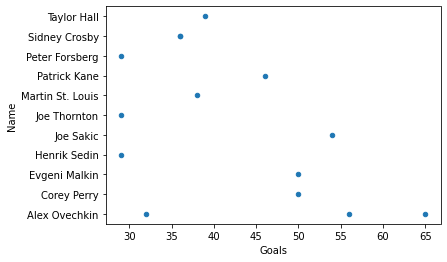

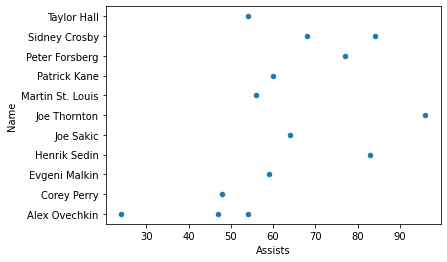

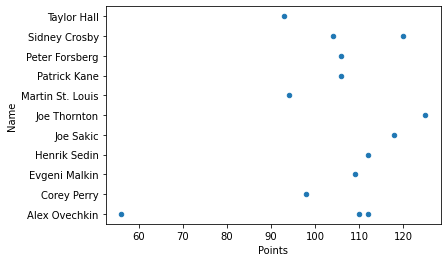

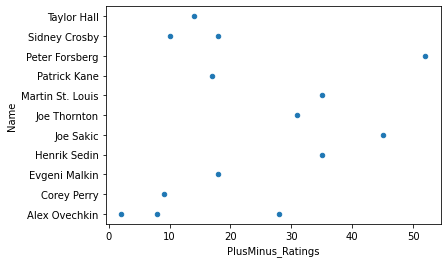

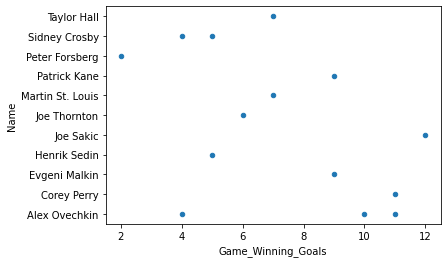

In [41]:
nhl_analysis_merged2.plot(kind='scatter', x='Goals', y='Name')
nhl_analysis_merged2.plot(kind='scatter', x='Assists', y='Name')
nhl_analysis_merged2.plot(kind='scatter', x='Points', y='Name')
nhl_analysis_merged2.plot(kind='scatter', x='PlusMinus_Ratings', y='Name')
nhl_analysis_merged2.plot(kind='scatter', x='Game_Winning_Goals', y='Name')

**We can see that there are also lower thresholds for specific statistics. In addition, we can see that there is a variaty in performance from player to player. One thing to point out is the outliers of Alex Ovechkin on the bottom row. The 2015 season missed half of the games due to a lockout.**